## EP20BTECH11015 - ASSIGNMENT 5

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy import optimize as opt
import sklearn.mixture as sklm
import pandas as pd

1. 

Download the asteroid dataset from http://astrostatistics.psu.edu/datasets/asteroid_dens.dat. 
Apply the Shapiro-Wilk test to both the asteroid density values and the natural logarithm of the density values.

From the p values, which of these is closer to a Gaussian distribution?

Verify this by plotting histograms of both density and its logarithm and
overlaying the best-fit normal distribution (Look up stats.norm.fit) (25
points)

In [8]:
aster = pd.read_csv('asteroid_dens.dat', sep=' ')
shapiro_val = st.shapiro(aster['Dens'])
shapiro_ln_val = st.shapiro(np.log(aster['Dens']))

print('p-value of Shapiro test for density:     ', shapiro_val.pvalue)
print('p-value of Shapiro test for log density: ', shapiro_ln_val.pvalue)
#print('Normal Fit',*st.norm.fit(aster['Dens'], loc=shapiro_val.statistic))

p-value of Shapiro test for density:      0.051220282912254333
p-value of Shapiro test for log density:  0.5660613775253296


#### From the p-values, we can see that the natural logarithm of the density values is closer to a Gaussian distribution. 

2. 
Download the Hipparcos star catalog from http://iith.ac.in/~shantanud/HIP_star.dat. 
Detailed explanation of the columns in this dataset can be
found in http://astrostatistics.psu.edu/datasets/HIP_star.html 
under “Dataset”. 

Calculate using two-sample t-test whether the color (B-
V) of the Hyades stars differs from the non-Hyades ones. 

The Hyades stars have Right Ascension between 50◦ and 100◦, declinations between 0 and 25◦
, proper motion in RA between 90 and 130 mas/year, proper
motion in DEC between -60 and -10 mas/year. 

Any other star which does
not satisfy any of the above conditions is considered a non-Hyades star.
(25 points)

In [9]:
hip = pd.read_csv('HIP_star.dat', sep=' ')
# Divide the stars into two groups: those in the Haydes cluster and those not in the Haydes cluster
hip_haydes = hip[ (hip['RA'] >= 50) & (hip['RA'] <= 100) & (hip['DE'] >= 0) & (hip['DE'] <= 25) & (hip['pmRA'] >= 90) & (hip['pmRA'] <= 130) & (hip['pmDE'] >= -60) & (hip['pmDE'] <= -10) ]

hip_non_haydes = hip[ (hip['RA'] < 50) | (hip['RA'] > 100) | (hip['DE'] < 0) | (hip['DE'] > 25) | (hip['pmRA'] < 90) | (hip['pmRA'] > 130) | (hip['pmDE'] < -60) | (hip['pmDE'] > -10) ]

haydes_BV = hip_haydes['B-V']
non_haydes_BV = hip_non_haydes['B-V']
print('Mean of B-V for stars in Haydes cluster:     ', np.mean(haydes_BV))
print('Mean of B-V for stars not in Haydes cluster: ', np.mean(non_haydes_BV))
print('Means are close but not equal')

Mean of B-V for stars in Haydes cluster:      0.6208924731182797
Mean of B-V for stars not in Haydes cluster:  0.7546207159177456
Means are close but not equal


#### NULL HYPOTHESIS: The color of the Hyades stars is same as the non-Hyades stars.

In [10]:
two_smp_t_test = st.ttest_ind(haydes_BV, non_haydes_BV, equal_var=False)
print('p-value: ', two_smp_t_test.pvalue)
print('p-value is smaller than 0.05, so we reject the null hypothesis\nI.e The colors of haydes and non-haydes stars are DIFFERENT')

p-value:  0.00019212855310889943
p-value is smaller than 0.05, so we reject the null hypothesis
I.e The colors of haydes and non-haydes stars are DIFFERENT


3.

The T90 distribution for Beppo-Sax T90 data can be found at http://www.iith.ac.in/~shantanud/beppoSax.txt. 

Apply GMM to log10 of
T90 data and find the optimum number of components using AIC and
BIC by plotting BIC as a function of number of componts (20 points)

(Hint: Look at the source code for astroML figure 6.6)

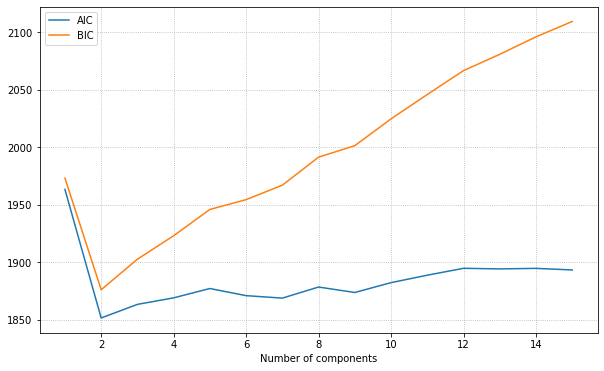

In [13]:
beppo = np.loadtxt('beppoSax.txt').reshape(-1, 1)
log10beppo = np.log10(beppo)

gmm_fit = [sklm.GaussianMixture(i).fit(log10beppo) for i in range(1, 16)]
aic = [i.aic(log10beppo) for i in gmm_fit]
bic = [i.bic(log10beppo) for i in gmm_fit]

#Plotting AIC and BIC vs number of components

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), aic, label='AIC')
plt.plot(range(1, 16), bic, label='BIC')
plt.legend()
plt.grid(True, ls=':', which='both')
plt.xlabel('Number of components')
plt.show()

#### From the graph, we see that the optimum number of components is 2.